In [2]:
import networkx as nx


In [3]:
# Making a graph object
graph = nx.Graph()

In [4]:
# adding a node
graph.add_node(1)

In [5]:
# adding a list 
graph.add_nodes_from([2,3])

In [6]:
# adding a nbunch
H = nx.path_graph(10)
graph.add_nodes_from(H)

In [8]:
graph.add_node(H)

In [9]:
# Adding edges one at a time
graph.add_edge(1,2)
# e tuple
e = (2,3)
# unfolding tuple into graph
graph.add_edge(*e)

In [11]:
# adding edges from list
graph.add_edges_from([(1,2),(1,3)])

In [12]:
# adding edges with a ebunch
# What is a ebunch though
graph.add_edges_from(H.edges())

In [13]:
# removing a node
graph.remove_node(H)


In [14]:
# clearing the graph
graph.clear()

In [15]:
graph.add_edges_from([(1,2),(1,3)])
graph.add_node(1)
graph.add_edge(1,2)
graph.add_node("spam")       # adds node "spam"
graph.add_nodes_from("spam") # adds 4 nodes: 's', 'p', 'a', 'm'

In [16]:
graph.number_of_nodes()

8

In [17]:
graph.number_of_edges()

2

In [18]:
graph.nodes()

['a', 1, 2, 3, 'spam', 'm', 'p', 's']

In [19]:
graph.edges()

[(1, 2), (1, 3)]

In [20]:
graph.neighbors(1)

[2, 3]

In [24]:
graph.remove_nodes_from("spam")
graph.nodes()
graph.remove_edge(1,3)

In [27]:
H = nx.DiGraph(graph)
H.edges()

[(1, 2), (2, 1)]

In [29]:
edgelist = [(0,1),(1,2),(2,3)]
H = nx.Graph(edgelist)

In [30]:
graph[1]

{2: {}}

In [31]:
graph[1][2]

{}

In [32]:
graph.add_edge(1,3)
graph[1][3]['color'] = 'blue'

In [35]:
FG = nx.Graph()
FG.add_weighted_edges_from([(1,2,0.125),(1,3,0.75),(2,4,1.2),(3,4,0.375)])
for n,numbers in FG.adjacency_iter():
    for number,eattribute in numbers.items():
        data = eattribute["weight"]
        if data < 0.5:
            print('(%d, %d, %.3f)' % (n,number,data))

(1, 2, 0.125)
(2, 1, 0.125)
(3, 4, 0.375)
(4, 3, 0.375)


In [38]:
# Obs there was an error in the tutorial code
for (u,v,d) in FG.edges(data="weight"):
    if d < 0.5:
        print('(%d, %d ,%.3f)' %(u,v,d))

(1, 2 ,0.125)
(3, 4 ,0.375)


# Graph attributes

In [40]:
graph = nx.Graph(day="Onsdag")
graph.graph

{'day': 'Onsdag'}

In [43]:
graph.graph["day"] = "Mandag"
graph.graph

{'day': 'Mandag'}

# Node attributes

In [49]:
graph.add_node(1,time="5pm")
graph.add_nodes_from([5], time='2pm')
graph.node[1]

{'room': 714, 'time': '5pm'}

In [52]:

graph.node[1]['room'] = 714
graph.nodes(data=True)

[(1, {'room': 714, 'time': '5pm'}), (5, {'time': '2pm'})]

# Edge Attributes

In [56]:
graph.add_edge(1,2,weight=4.7)
edgelist = [(3,4),(4,5)]
edgelist2 = [(1,2,{'color':'blue'}), (2,3,{'weight':8})]
graph.add_edges_from(edgelist, color='red')
graph.add_edges_from(edgelist2)
# adding attributes with subscript notation
graph[1][2]["weight"] = 4.7
# adding with .edge
graph.edge[1][2]["weight"] = 4

# Directed graphs

In [60]:
DG = nx.DiGraph()
DG.add_weighted_edges_from([(1,2,0.5), (3,1,0.75)])
DG.out_degree(1, weight = "weight")

0.5

In [62]:
DG.degree(1,weight="weight")

1.25

In [63]:
DG.successors(1)

[2]

In [64]:
DG.neighbors(1)

[2]

In [65]:
H = nx.Graph(DG)

In [70]:
print(H.nodes())
print(H.edges())


[1, 2, 3]
[(1, 2), (1, 3)]


# Multigraphs

In [73]:
# A multigraph can add the same edge twice with different edge data.
MG = nx.MultiGraph()
edgelist = [(1,2,.5), (1,2,.75), (2,3,.5)]
MG.add_weighted_edges_from(edgelist)
MG.degree(weight="weight")

{1: 1.25, 2: 1.75, 3: 0.5}

In [77]:
GG = nx.Graph()
for node, numbers in MG.adjacency_iter():
    for number, edgedict in numbers.items():
        minvalue = min([d["weight"] for d in edgedict.values()])
        #minvalue = 0.5 ?!?!?! 
        GG.add_edge(node,number,weight = minvalue)

nx.shortest_path(GG, 1, 3)

[1, 2, 3]

In [79]:
GG.edges(data=True)

[(1, 2, {'weight': 0.5}), (2, 3, {'weight': 0.5})]

In [81]:
#Getting connected components from a graph
for component in nx.connected_components(GG):
    print(component)

set([1, 2, 3])


In [82]:
# Getting the degree of the nodes
nx.degree(GG).values()

[1, 2, 1]

In [93]:
# getting clustering coefficient
GG.add_edge(1,3,weight = 0.5) # This makes the graph complete and the coefficient is now 1
nx.clustering(GG)

{1: 1.0, 2: 1.0, 3: 1.0}

In [95]:
import matplotlib.pyplot as plt
% matplotlib inline

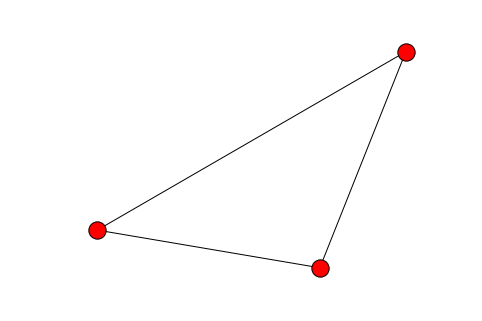

In [96]:
nx.draw(GG)

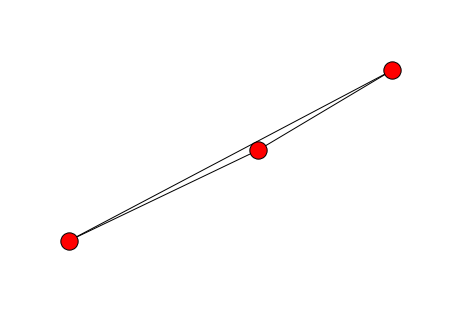

In [97]:
nx.draw_random(GG)

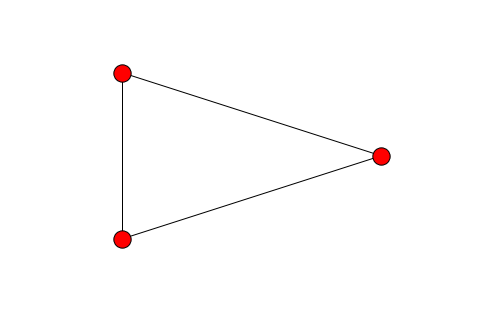

In [98]:
nx.draw_circular(GG)

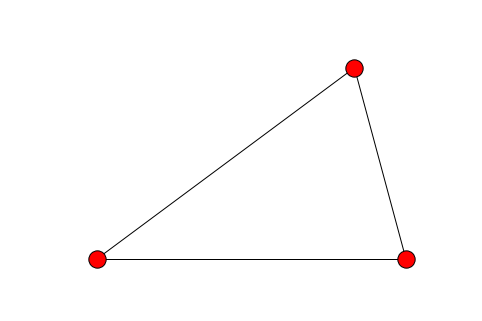

In [99]:
nx.draw_spectral(GG)

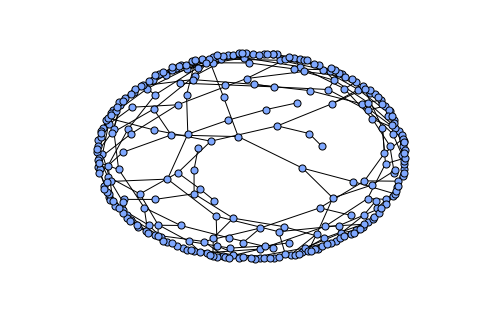

In [261]:
H = nx.random_lobster(100,0.9,0.9)
nx.draw(H,node_size = 50, with_labels=False,node_color='#7FA8FF')


In [112]:
from networkx.drawing.nx_pydot import write_dot
from networkx.drawing.nx_agraph import graphviz_layout


In [109]:
G = nx.complete_graph(5)
pos = graphviz_layout(G)
nx.draw_graphviz(G,pos)

ImportError: ('requires pygraphviz ', 'http://pygraphviz.github.io/')

# Part 2

> * Go to NS Section 2.12: Homework, then
>   * Write the solution exercise **2.1** (the 'Königsberg Problem') from NS in your `notebook`. 




>   * Solve exercise **2.3** ('Graph representation') from NS using `NetworkX` in your `notebook`. (You don't have to solve the last sub-question about *cycles of length 4* ... but I'll be impressed if you do it).
>   * Solve exercise **2.5** ('Bipartite Networks') from NS using `NetworkX` in your `notebook`.
> 

>  Königsberg Problem
    > * Which of the icons in Image 2.19 can be drawn without raising yourpencil from the paper, and without drawing any line more than once? Why?
    
> Its possible to draw a) ,c) ,d). This is because if we model the problem as a graph where the lines represent links and where the any line crosses eachother as a node.

> Then this problem can be seen as an euler walk. Because the lines are drawn/traversed only once. For the walk to be possible there are maximally two nodes that can have a uneven number of links going into it. The drawing b) has 4 nodes with uneven links connected to it.





>   * Solve exercise **2.3** ('Graph representation') from NS using `NetworkX` in your `notebook`. (You don't have to solve the last sub-question about *cycles of length 4* ... but I'll be impressed if you do it).

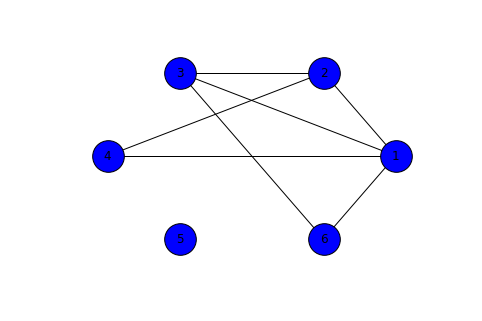

In [295]:
import matplotlib.pyplot as plt
% matplotlib inline
# Creating the a) undirected graph
a_graph = nx.Graph()

# adding nodes
a_nodelist = [1,2,3,4,5 ,6]
a_graph.add_nodes_from(a_nodelist)

# adding edges
a_edgelist = [(1,2),(1,3),(1,4),(1,6),(2,3),(2,4),(3,6)]
a_graph.add_edges_from(a_edgelist)

# draw graph
nx.draw_circular(a_graph, with_labels=True, node_size=1000, node_color='blue')

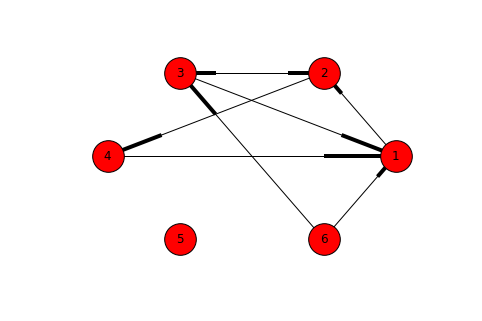

In [296]:
# creating the b) directed graph

b_graph = nx.DiGraph()
b_nodelist = [1,2,3,4,5,6]
b_graph.add_nodes_from(b_nodelist)

b_edgelist = [(1,2),
             (2,3),(2,4),
             (3,2),(3,1),
             (4,1),
             (6,1),(6,3)]
b_graph.add_edges_from(b_edgelist)

nx.draw_circular(b_graph,with_labels=True,node_size=1000)

('a_graph', 0.6388888888888888)


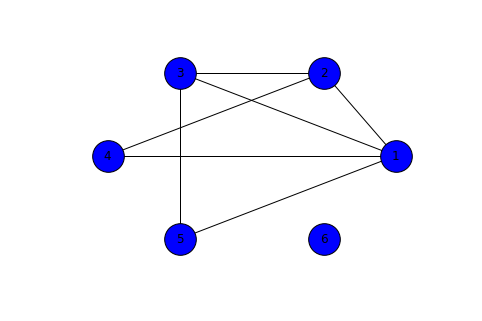

In [32]:
def average_cluster_coefficient(graph, message):
    average_cluster_coefficient = nx.average_clustering(graph)
    print(message,a_average_cluster_coefficient)

# - Determining average clustering coefficient for graph a
average_cluster_coefficient(a_graph, "a_graph")


In [ ]:
# - If you switch the labels of nodes 5 and 6 in Image 2.20a, how does that move change the adjacency matrix? And the link list?

a_graph_changed = nx.Graph()

# adding nodes
a_nodelist = [1,2,3,4,5 ,6]
a_graph_changed.add_nodes_from(a_nodelist)

# adding edges
a_edgelist_changed = [(1,2),(1,3),(1,4),(1,5),(2,3),(2,4),(3,5)]
a_graph_changed.add_edges_from(a_edgelist_changed)

nx.draw_circular(a_graph_changed, with_labels=True, node_size=1000, node_color='blue')

In [34]:
# What kind of information can you not infer from the link list representation of the network 
# that you can infer from the adjacency matrix?

# If the network as disconnected components
# It is possible to determain the ki degree of a node by summing the row or column for that node in question. 
# The adjacency matrix can also be used to infer the number of outgoing and incomming degree for a directed graph
# by summing over rows and columns

In [314]:
# In the (a) network, how many paths (with possible repetition of nodes and links)
# of length 3 exist starting from node 1 and ending at node 3? And in (b)?

def path_from_source_to_target_length_n(graph,source,target,length):
    paths = list()
    length += 1
    for path in nx.all_simple_paths(graph,source=source,target=target):
        if(len(path) == length):
            print(path)
            paths.append(path)
    return paths
    

print("a)")
path_from_source_to_target_length_n(a_graph,1,3,3)
# There exists 1 path for graph a
 
print("b)")

path_from_source_to_target_length_n(b_graph,1,3,3)
        
# There exists 0 paths from graph b


a)
[1, 4, 2, 3]
b)


[]

In [58]:
# With the help of a computer, count the number of cycles of length 4 in both networks.
print("graph a cycles")
a_directed_graph = a_graph.to_directed()
for cycle in nx.simple_cycles(a_directed_graph):
    if(len(cycle) == 4):
        print(cycle)

print("graph b cycles")
for cycle in nx.simple_cycles(b_graph):
    if(len(cycle) == 4):
        print(cycle)

graph a cycles
[1, 6, 3, 2]
[1, 4, 2, 3]
[1, 3, 2, 4]
[1, 2, 3, 6]
graph b cycles


>   * Solve exercise **2.5** ('Bipartite Networks') from NS using `NetworkX` in your `notebook`.

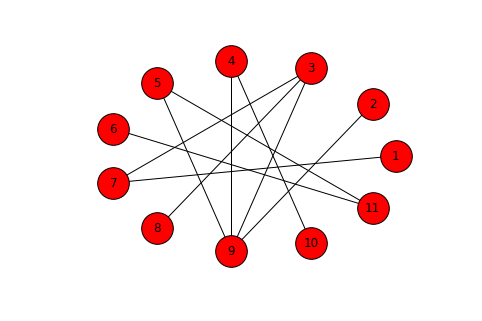

In [92]:
# Creating a bigraph
from networkx.algorithms import bipartite

bi_graph = nx.Graph()

purple_nodes = [1, 2, 3, 4, 5, 6]
green_nodes = [7, 8, 9, 10, 11]

bi_graph.add_nodes_from(purple_nodes,bipartite="purple")
bi_graph.add_nodes_from(green_nodes,bipartite="green")



bi_edges = [(1,7),
        (2,9),
        (3,7),(3,8),(3,9),
        (4,9),(4,10),
        (5,9),(5,11),
        (6,11)]

bi_graph.add_edges_from(bi_edges)

nx.draw_circular(bi_graph, with_labels = True,node_size=1000)


In [108]:
# Calculate the average degree of the purple nodes and the average degree of the green nodes in the bipartite network.

def average_degree(graph,nodes):
    degree_dict = graph.degree(nodes)
    counter = 0.0
    for node in degree_dict.keys():
        counter += degree_dict[node]
    average_degree = counter / len(degree_dict)
    
    return average_degree

print("Total average" , average_degree(bi_graph,purple_nodes + green_nodes))
print("Purple nodes" , average_degree(bi_graph,purple_nodes))
print("Green nodes", average_degree(bi_graph,green_nodes))

('Total average', 1.8181818181818181)
('Purple nodes', 1.6666666666666667)
('Green nodes', 2.0)


In [109]:
# Calculate the average degree in each of the two network projections.
# Is it surprising that the values are different from those obtained in point (c)?
def draw_projection(graph, nodes, color):
    projection = bipartite.projected_graph(graph, nodes)
    nx.draw_circular(projection, with_labels = True, node_size=1000 , node_color=color)

def average_degree_in_projection(graph, nodes):
    projection = bipartite.projected_graph(graph, nodes)
    return average_degree(projection, nodes)
    


('Average degree in green projection', 2.0)


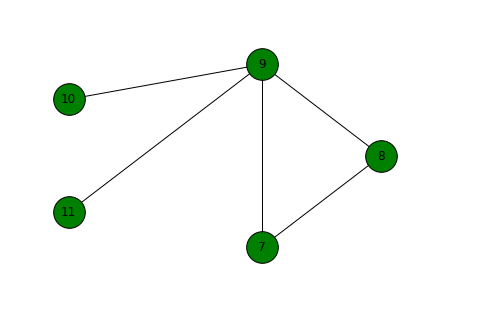

In [110]:
draw_projection(bi_graph,green_nodes,"green")
print("Average degree in green projection" , average_degree_in_projection(bi_graph,green_nodes))

('Average degree in purple projection', 2.6666666666666665)


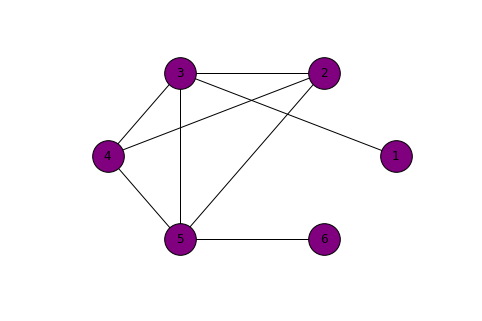

In [111]:
draw_projection(bi_graph,purple_nodes,"purple")
print("Average degree in purple projection" , average_degree_in_projection(bi_graph,purple_nodes))

In [112]:
# Bipartite Networks - General Considerations
# Consider a bipartite network with N1 and N2 nodes in the two sets.

# What is the maximum number of links Lmax the network can have?
# N1 * N2 

# How many links cannot occur compared to a non-bipartite network of size N = N1 + N2 ?
# (N1 * (N1-1)) - (N2 * (N2 - 1))

# If N1‹‹N2 , what can you say about the network density,
# that is the total number of links over the maximum number of links, Lmax?

# help, That it is bounded by N2 ???

# Find an expression connecting N1, N2 and the average degree for the two sets in the bipartite network, 〈k1〉 and 〈k2〉.
# help, ???

# Part 3: Plotting degree distributions

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import networkx as nx
% matplotlib inline

In [2]:
# Binning real numbers
random_normal = np.random.normal(loc=0.125, scale=2, size=1000)


In [3]:
hist, bin_edges = np.histogram(random_normal,bins=10)

In [4]:
# The two arrays does not have the same length
# The distributions are placed between the numbers
print(hist)
print(len(hist))
print(bin_edges)
print(len(bin_edges))

[  9  28 103 166 255 225 130  63  15   6]
10
[-5.9209762  -4.64656206 -3.37214791 -2.09773377 -0.82331963  0.45109452
  1.72550866  2.99992281  4.27433695  5.54875109  6.82316524]
11


(array([   9.,   28.,  103.,  166.,  255.,  225.,  130.,   63.,   15.,    6.]),
 array([-5.9209762 , -4.64656206, -3.37214791, -2.09773377, -0.82331963,
         0.45109452,  1.72550866,  2.99992281,  4.27433695,  5.54875109,
         6.82316524]),
 <a list of 10 Patch objects>)

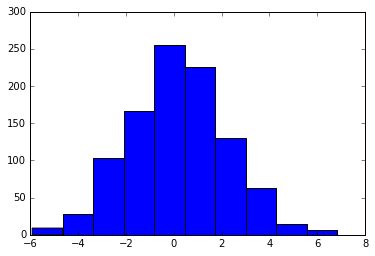

In [5]:
# Plotting the binned data
plt.hist(random_normal,bins=10)

In [6]:
# Binning integers
poisson_dist = np.random.poisson(size=5000,lam=10)

In [7]:
# Minimum value
min_value = np.min(poisson_dist)
print(min_value)

# Max value
max_value = np.max(poisson_dist)
print(max_value)

1
23


Instead of simplify specifying the number of bins for numpy.histogram, let's specify the bins we want using a vector. Create a vector that results in a binning that puts each integer value in its own bin and where the first bin contains the minimum number you found above, and the last bin contains the maximum number. What is the sum over bin counts? Explain how the binning-vectors first and last element relates to the min and max from the Poisson distribution.

In [8]:
# The sum of bin counts equals 5000
bin_vector = [i for i in range(min_value,max_value) ]
hist, bin_edges = np.histogram(poisson_dist, bins= bin_vector)


(array([   4.,    9.,   26.,   98.,  195.,  329.,  463.,  584.,  609.,
         614.,  558.,  448.,  382.,  280.,  170.,  103.,   66.,   35.,
          14.,    6.,    5.]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22]),
 <a list of 21 Patch objects>)

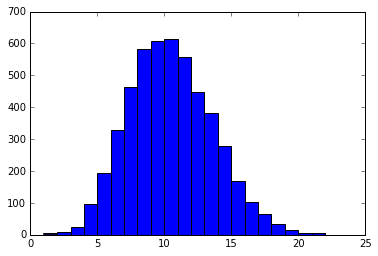

In [9]:
# Plot using hist 
# This is as a incorrect plot
plt.hist(poisson_dist,bins=bin_vector)

<Container object of 21 artists>

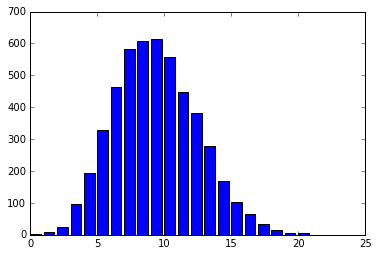

In [10]:
# Now, use a bar chart (matplotlib.pyplot.bar) to plot the distribution
index = np.arange(len(hist))
plt.bar(index,hist)

 * Binning and plotting degree distributions.
 
Let's generate the Erdös-Renyi (ER) network which has a degree distribution that matches the Poisson distribution above. First we have to figure out which values the ER parameters (N and p) should assume. It's easy to see that N=5000N=5000, but how do you find pp? Hint: The parameter λλ in the Poisson distribution corresponds to the average degree, so you have to find a pp that results in an average degree, k=10k=10. And you know that ⟨k⟩=p(N−1)⟨k⟩=p(N−1), which will give you pp. Note that Python by default returns the result of divisions as the most precise of the datatypes involved (for instance, try computing 1/2 and 1.0/2.0 in your notebook). If you want division to always give you a decimal number, you can enter from __future__ import division at the beginning of your notebook.

In [11]:
# creating the ER network
p = 10.0 / (5000 - 1)
er_graph = nx.gnp_random_graph(5000,p)


Now, use networkx to create the graph and extract the degree distribution.

In [12]:
def create_histogram_from_graph(graph):
    
    min_value = np.min(nx.degree(graph).values())
    max_value = np.max(nx.degree(graph).values())

    bin_vector = [i for i in range(min_value,max_value) ]
    hist, bin_edges = np.histogram(nx.degree(graph).values(), bins = bin_vector)
    
    return hist
    
def create_bar_from_hist(hist):
    index = np.arange(len(hist))
    plt.bar(index,hist)

hist = create_histogram_from_graph(er_graph)


Finally, create a nice bar plot of the degree distribution, including axes labels and a plot title. Make sure that it looks like the Poisson distribution you plotted above.

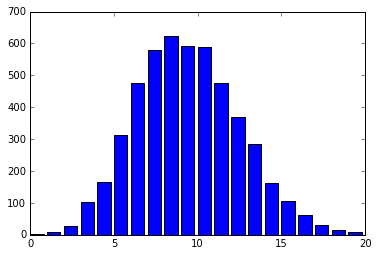

In [17]:
create_bar_from_hist(hist)

# Part 4: Random networks

Work through NS exercise 3.1 ('Erdős-Rényi Networks'). The exercise can be found in Section 3.11: Homework.

Erdős-Rényi Networks

Consider an Erdős-Rényi network with N = 3,000 nodes, connected to each other with probability p = 10–3.

What is the expected number of links, 〈L〉?



In [54]:
import math
# The expected is 
def average_number_of_links(p,n):
    return p * ((n *( n-1))/2 )

average_number_of_links(10**-3,3000)

4498.5

In which regime is the network?



In [35]:
def average_degree_k(p,n):
    return p * (n-1)
k = average_degree_k(10**-3,3000)
lnN = math.log(3000)
print("k", k)
print("lnN", lnN)
# The network is in the supercritical regime
# k > 1 and p > 1/N

('k', 2.999)
('lnN', 8.006367567650246)


Calculate the probability p(c) so that the network is at the critical point

k = 1 = p * (N-1)

p = 1/(N-1)

In [78]:
pc = 1.0 / (N - 1)
print(pc)

0.000333444481494


In [77]:
# p(1)
def k_connections_probability(p,k):
    return p**k

def none_k_connect_probability(p,N,k):
    return (1-p)**(N-1-k)

def potential_links(N,k):
    return math.factorial(N) / (math.factorial(k) * math.factorial(N - k))




Given the linking probability p = 10–3, calculate the number of nodes Ncr so that the network has only one component.

In [140]:
# k = 1
# 1 = p * (N - 1)
p = 10**-3
Ncr = 1 + (1/p) + 1
k = p*(Ncr - 1)

print("Nrc", Ncr)

('Nrc', 1002.0)


For the network in (d), calculate the average degree 〈kcr〉 and the average distance between two randomly chosen nodes 〈d〉.

In [138]:
def average_distance(N,k):
    return math.log(N) / math.log(k)
print(k)
print(average_distance(Ncr,k))

1.001
6913.20758276


Calculate the degree distribution pk of this network (approximate with a Poisson degree distribution).

In [150]:
def degree_distribution_poisson_approximation(k):
    return math.exp(-k)*(k**k / math.factorial(k))

degree_distribution_poisson_approximation(1)


0.36787944117144233

### Paths. Plot a random network with 200 nodes and an average degree of 1.5. (I suggest using networkx.draw and reading the documentation carefully to get an overview of all the options and what they look like. For example, you may want to shrink the node size).

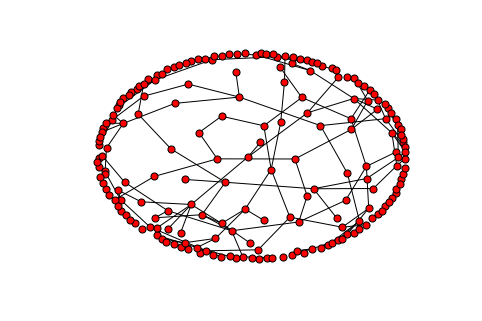

In [208]:
N = 200
p = 1.5 / (N - 1)

random_network = nx.gnp_random_graph(N, p)

pos = nx.spring_layout(random_network, scale = 1.0 )
nx.draw(random_network, pos , node_size = 50)


Extract the Giant Connected Component, GCC. (Hint. You can use networkx.connected_component_subgraphs)

In [216]:
giant_connected_component = max(nx.connected_component_subgraphs(random_network) , key=len)

Choose a node at random from the GCC. (Hint: You may want to try random.choice.)

In [279]:
random_node = random.choice(giant_connected_component.nodes())

Find all nodes that are precisely 2 steps away from that node. (Hint. I suggest networkx.single_source_shortest_path_length)

In [291]:
def nodes_n_steps_away(graph,source,cutoff):

    random_path = nx.single_source_shortest_path_length(graph,source=source,cutoff= cutoff)
    
    nodes_n_steps_away = list()
    for node in random_path:
        if random_path[node] == cutoff:       
            nodes_n_steps_away.append(node)
            
    return nodes_n_steps_away




Plot the GCC with the following choice of colors. Starting node black ("#000000"). The nodes 2 steps away red ("#ff0000").

All other nodes blue ("#A0CBE2"). Again, I suggest using networkx.draw_networkx() and reading the documentation carefully find out how to color individual nodes.

In [355]:
# Color all edges black
def color_edges(graph,color):
    
    for e in graph.edges():
        graph[e[0]][e[1]]['color'] = color
 
def color_edges_between_nodes(graph ,nodes_n_steps_away, source, length, color):
    # Color paths
    for node in nodes_n_steps_away:
        paths = path_from_source_to_target_length_n(graph, source, node,length)
        path = paths[0]
        for i in xrange(len(path)-1):
            graph[path[i]][path[i+1]]['color'] = color

def create_edge_color_list(graph):
    edge_color_list = [ graph[e[0]][e[1]]['color'] for e in graph.edges() ]
    return edge_color_list    


# Refactor the code below!

[165, 145, 34]
[165, 145, 119]


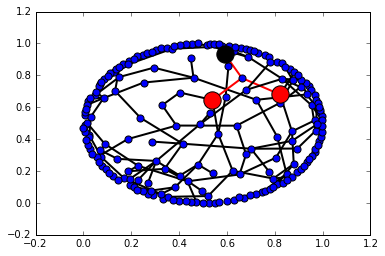

In [360]:
nodes_2_steps_away = nodes_n_steps_away(random_network,random_node,2)

color_edges(random_network,"black")
color_edges_between_nodes(random_network, nodes_2_steps_away, random_node, 2 , "red")
edge_color_list = create_edge_color_list(random_network)


# Drawing graph

# Color Nodes 
nx.draw_networkx_nodes(random_network, pos, node_color="blue", node_size = 50)
nx.draw_networkx_nodes(random_network, pos, nodelist=[random_node], node_color="black")
nx.draw_networkx_nodes(random_network, pos, nodelist=nodes_2_steps_away, node_color="red")

# Color edges
nx.draw_networkx_edges(random_network, pos, edge_color = edge_color_list, width=2)